- Mahdieh Sadat Benis  (9831702)

# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
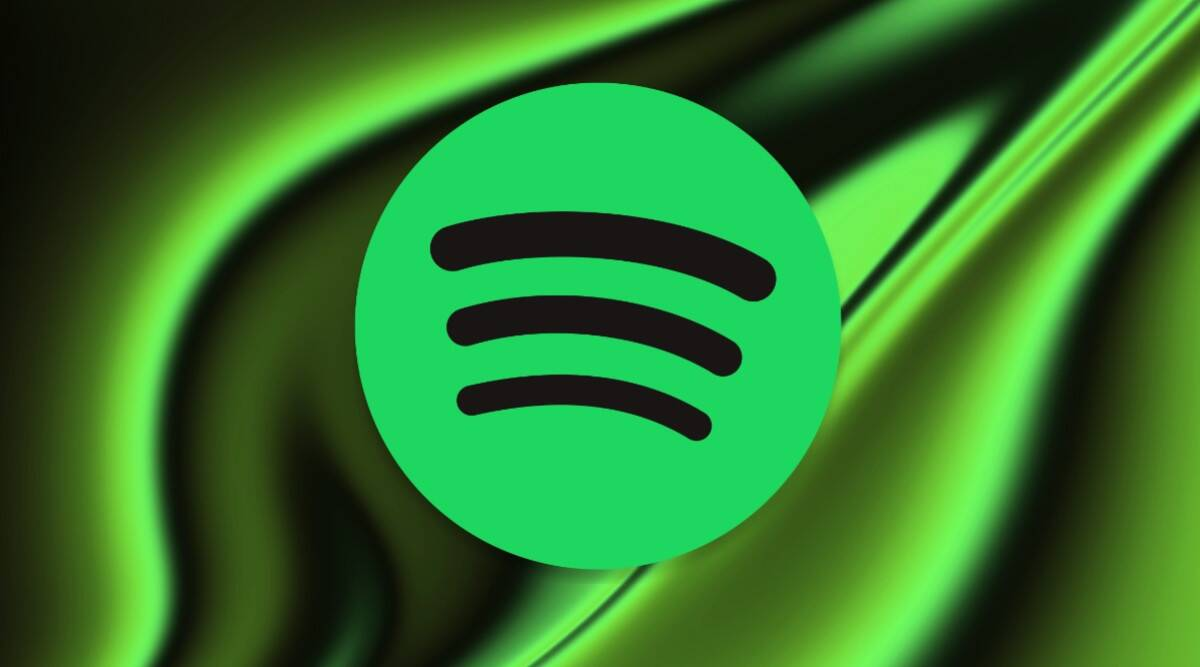
</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from pprint import pprint 
import warnings
warnings.filterwarnings(action='ignore')
import itertools

In [2]:
%pwd

'/Users/mahdieh/Desktop/aut/Term 8/CE/Data Mining/Project/DM_Project'

# Load Spotify Dataset (CSV file)

In [3]:
spotify_df = pd.read_csv("Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


In [4]:
spotify_df.shape

(10632, 32)

# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [5]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [6]:
list(spotify_df.columns)

['track_id',
 'disc_number',
 'duration_ms',
 'explicit',
 'track_name',
 'track_name_farsi',
 'artist_name',
 'artist_name_farsi',
 'popularity',
 'track_number',
 'album_href',
 'album_id',
 'album_name',
 'album_release_date',
 'album_total_tracks',
 'album_release_year',
 'track_href',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'key_name',
 'mode_name',
 'key_mode']

In [7]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10632 entries, 0 to 10631
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            10632 non-null  object 
 1   disc_number         10632 non-null  int64  
 2   duration_ms         10632 non-null  int64  
 3   explicit            10632 non-null  bool   
 4   track_name          10632 non-null  object 
 5   track_name_farsi    612 non-null    object 
 6   artist_name         10632 non-null  object 
 7   artist_name_farsi   10632 non-null  object 
 8   popularity          931 non-null    float64
 9   track_number        10632 non-null  int64  
 10  album_href          931 non-null    object 
 11  album_id            10632 non-null  object 
 12  album_name          10632 non-null  object 
 13  album_release_date  10632 non-null  object 
 14  album_total_tracks  931 non-null    float64
 15  album_release_year  10632 non-null  int64  
 16  trac

In [8]:
spotify_df["explicit"] = spotify_df["explicit"].astype(int)
spotify_df['album_release_date'] = pd.to_datetime(spotify_df['album_release_date'])
spotify_df['album_release_year'] = spotify_df['album_release_date'].dt.strftime('%Y')
spotify_df['album_release_year'] = spotify_df['album_release_year'].astype(int)

In [9]:
numeric_cols = list(spotify_df.select_dtypes(include=['int64', 'float64']).columns)
print("number of numeric features: ", len(numeric_cols))
numeric_cols

number of numeric features:  19


['disc_number',
 'duration_ms',
 'explicit',
 'popularity',
 'track_number',
 'album_total_tracks',
 'album_release_year',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [10]:
categirical_cols = list(spotify_df.select_dtypes(include=['object']).columns)
print("number of categirical features: ", len(categirical_cols))
categirical_cols

number of categirical features:  12


['track_id',
 'track_name',
 'track_name_farsi',
 'artist_name',
 'artist_name_farsi',
 'album_href',
 'album_id',
 'album_name',
 'track_href',
 'key_name',
 'mode_name',
 'key_mode']

<AxesSubplot:xlabel='key_mode', ylabel='count'>

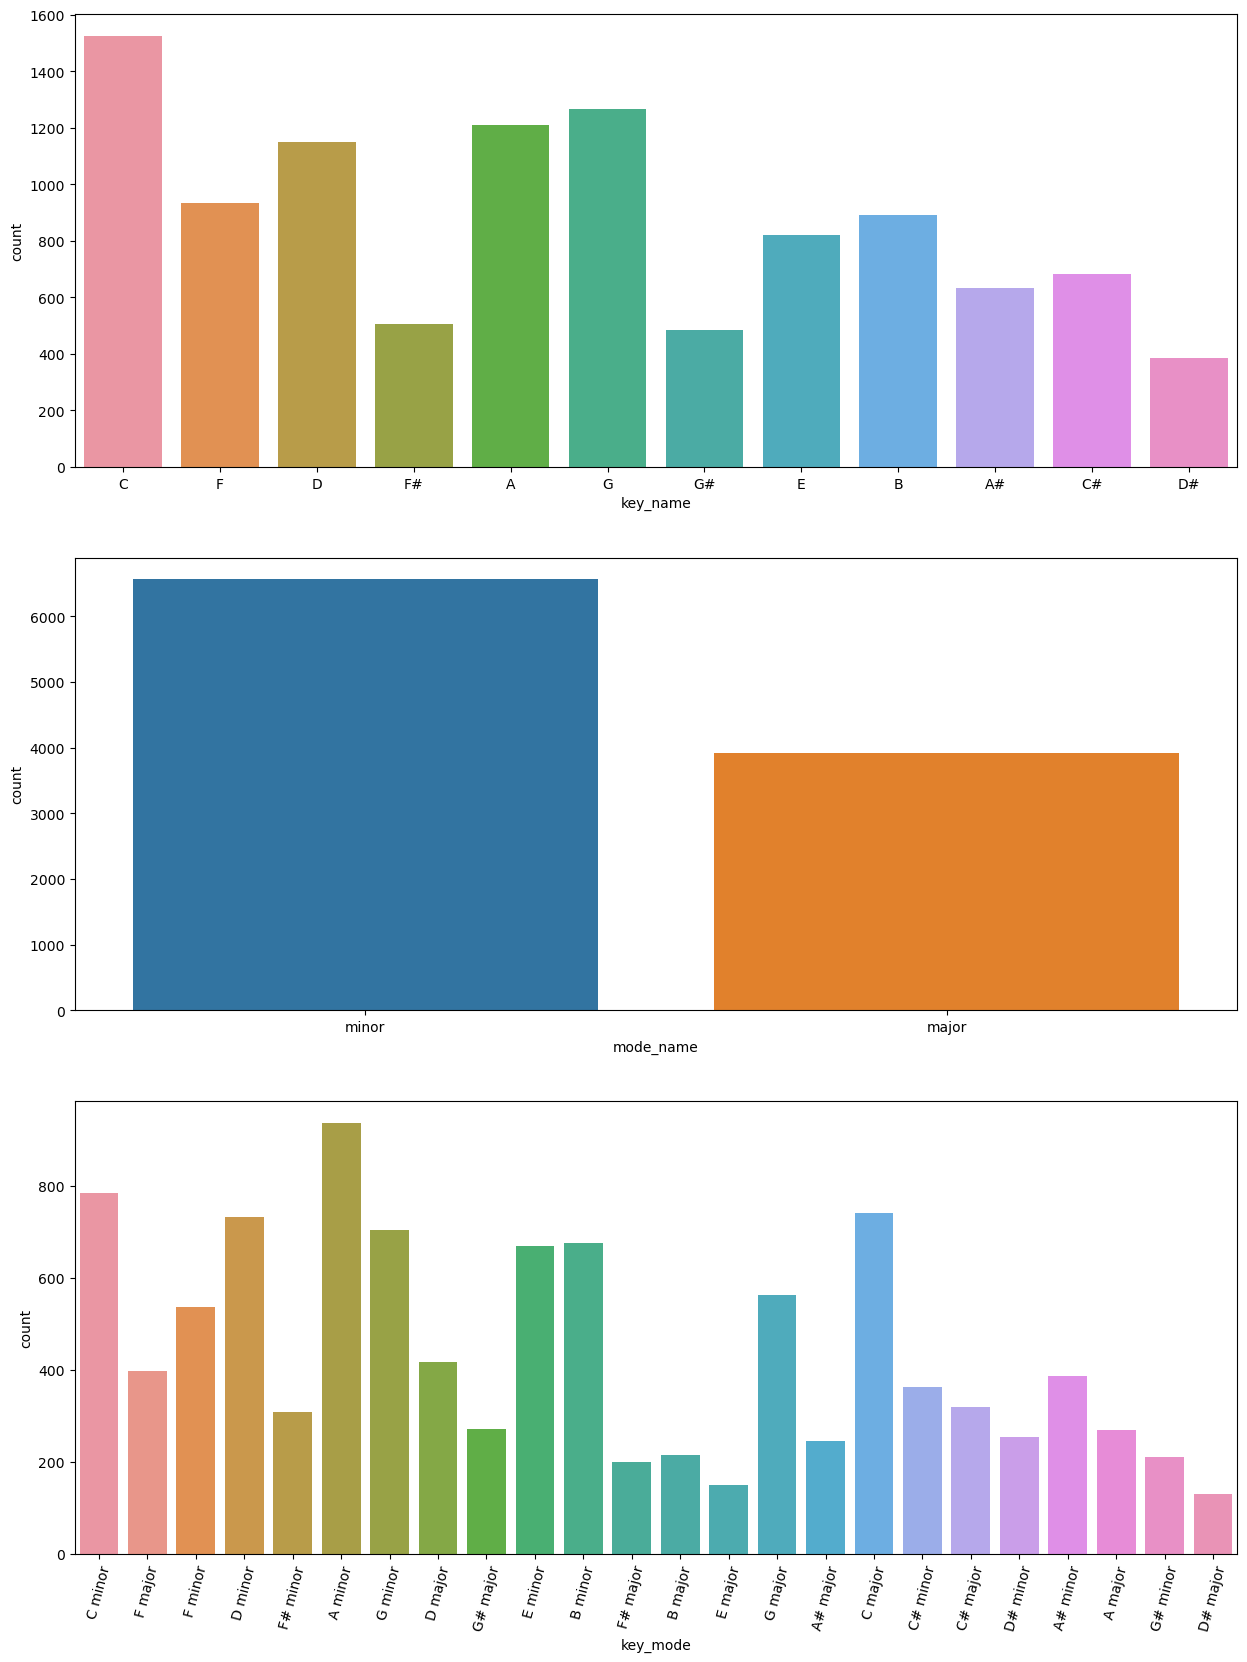

In [11]:
fig, ax = plt.subplots(3 , 1,figsize=(15,20))
plt.rc('xtick', labelsize=15) 
sns.countplot(x = spotify_df['key_name'], data = spotify_df, ax=ax[0])
sns.countplot(x = spotify_df['mode_name'], data = spotify_df, ax=ax[1])
plt.xticks(rotation = 75)
sns.countplot(x = spotify_df['key_mode'], data = spotify_df, ax=ax[2])

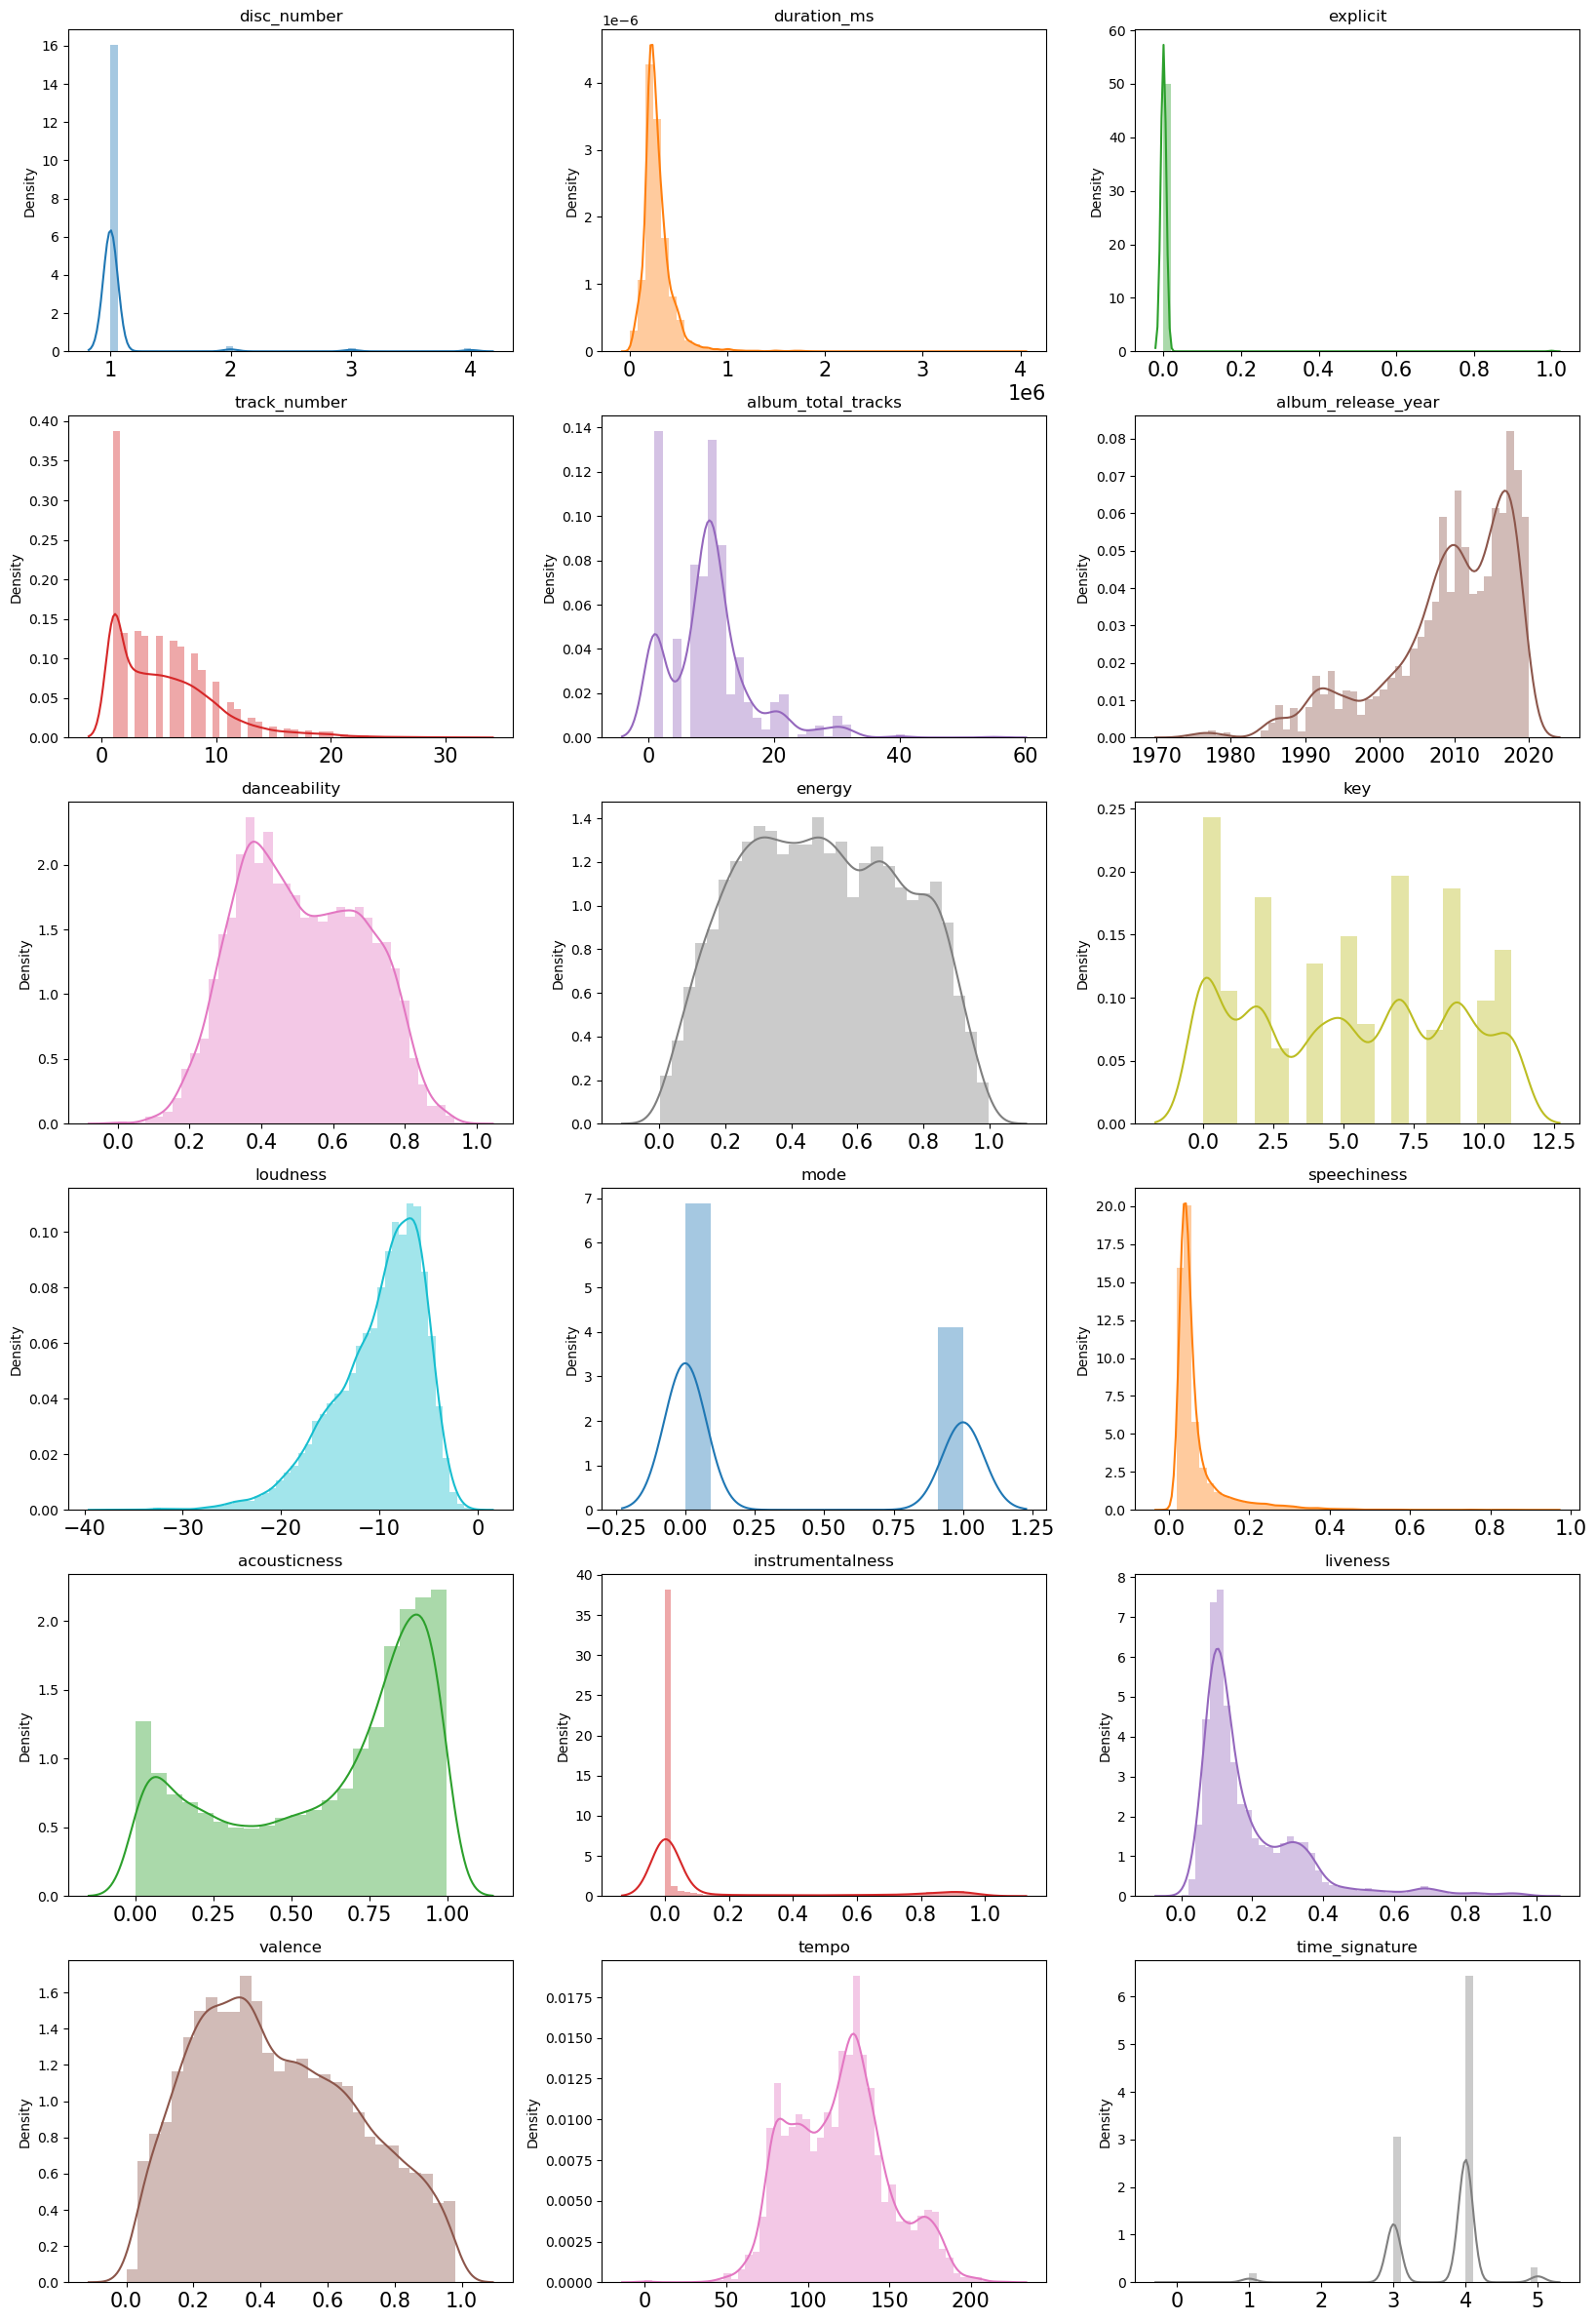

In [12]:
fig, ax = plt.subplots(6, 3, figsize = (20,30))
palette = itertools.cycle(sns.color_palette())
x = 0
for col in numeric_cols:
    if col == "popularity":
        continue
    c = next(palette)
    sns.distplot(x = spotify_df[col], ax = ax[(int)(x/3)][(int)(x%3)], color=c)
    ax[(int)(x/3)][(int)(x%3)].title.set_text(col)
    x += 1

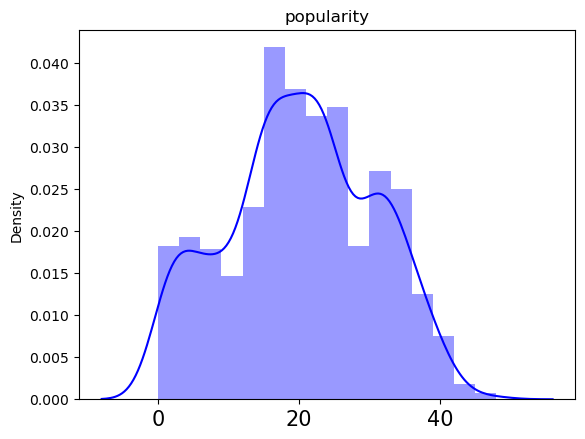

In [13]:
sns.distplot(x = spotify_df["popularity"], color="blue")
plt.title("popularity")
plt.show()

## Q: Get number of songs by each of the artists in descending order

In [14]:
# To be completed

In [15]:
print("Number of Artists:", spotify_df['artist_name_farsi'].value_counts().count())
print("List of Artists: ")
print("="*80)
spotify_df['artist_name'].unique()

Number of Artists: 69
List of Artists: 


array(['Salar Aghili', 'Mohsen Yeganeh', 'Mehdi Yarrahi',
       'Mohammadreza Shajarian', 'Morteza Pashaei', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Mohsen Chavoshi', 'Reza Sadeghi',
       'Abdolhosein Mokhtabad', 'Alireza Assar', 'Roozbeh Nematollahi',
       'Hossein Alizadeh', 'Peyman Yazdanian', 'Kayhan Kalhor',
       'Siavash Ghomayshi', 'Benyamin Bahadori', 'Alireza Eftekhari',
       'Majid Akhshabi', 'Faramarz Aslani', 'Iraj Bastami',
       'Ehsan Khajeh Amiri', 'Alireza Ghorbani', 'Parviz Meshkatian',
       'Mohammad Reza Lotfi', 'Dang Show', 'Nasser Abdollahi',
       'Soheil Nafissi', 'Farhad Mehrad', 'Afshin Moghaddam',
       'Koveyti Poor', 'Mohammad Golriz', 'Abbas Ghaderi',
       'Javad Yassari', 'Sattar', 'Mohsen Sharifian', 'Babak Jahanbakhsh',
       'Mazyar Fallahi', 'Mohammad Alizadeh', 'Farzad Farzin',
       'Ali Zand Vakili', 'Amirabbas Golab', 'Hamid Askari',
       'Mohsen Namjoo', 'Hamed Homayoun', 'Kaveh Deylami', 'Hatam Asgari',
       'Hamid

In [16]:
artist_number_of_songs = spotify_df['artist_name'].value_counts()
artist_number_of_songs.to_frame(name = 'count')

,count
Mohammadreza Shajarian,554
Hossein Alizadeh,545
Reza Sadeghi,507
Dariush,465
Alireza Eftekhari,439
...,...
Nasser Abdollahi,22
Mohammad Golriz,17
Ebrahim Monsefi,16
Farman Fathalian,10


In [17]:
artist_track = spotify_df[['artist_name', 'track_name']]
artist_track

,artist_name,track_name
0,Salar Aghili,Ghazale Taze
1,Salar Aghili,Ayeeneye Hosn
2,Salar Aghili,Tarke Eshgh
3,Salar Aghili,Moghbacheye Bade Foroosh
4,Salar Aghili,Bigharar
...,...,...
10627,Shahram Nazeri,Zarbie Bayat Tork (Che Danestam)
10628,Shahram Nazeri,Conserte Asatid
10629,Shahram Nazeri,Soofi Nameh
10630,Shahram Nazeri,Saghi Nameh


***
Some tracks of a singer have different features, for example, Chaharmezrab Salar Aghili has different features on Spotify with three diffrent track_ids.
***

In [18]:
spotify_df['track_name'].value_counts()

Chaharmezrab                29
Booy-e-Baran                27
Avaz                        26
Gonbad-e-Mina               18
Daramad                     17
                            ..
Yar-E-Dardmandan             1
Dar Haram-E-Ghods            1
Rahzan-e-Delha               1
Az Shahr-e-Shoma Miravam     1
Existence: Life              1
Name: track_name, Length: 7586, dtype: int64

In [19]:
spotify_df.loc[spotify_df['track_name'] == 'Chaharmezrab'].head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
216,0hKonLUEwcIHoDi2WkZ2d2,1,202760,0,Chaharmezrab,NaN,Salar Aghili,سالار عقیلی,NaN,6,...,0.0341,0.816,0.8420,0.288,0.8000,107.363,4,B,minor,B minor
322,4xBsPVMdiaKRftVqleQhFH,1,140661,0,Chaharmezrab,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0405,0.880,0.8940,0.297,0.4690,103.593,4,G,major,G major
350,3AKoPaJ2jtJ2WVs8PKrunc,1,445720,0,Chaharmezrab,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.866,0.0259,0.240,0.4380,98.925,3,A,minor,A minor
2145,4GJXFDanhdJapCW1P4NBFN,1,279706,0,Chaharmezrab,NaN,Abdolhosein Mokhtabad,عبدالحسین مختاباد,NaN,6,...,0.0386,0.954,0.9230,0.233,0.5260,167.862,3,G,minor,G minor
2181,6HIhWoX8HAp6v1zN7rTb4F,1,91133,0,Chaharmezrab,NaN,Abdolhosein Mokhtabad,عبدالحسین مختاباد,NaN,4,...,0.0551,0.761,0.3370,0.163,0.0953,153.442,3,D,major,D major


## Q: Get the average duration of songs by each of the artists in minutes

In [20]:
# To be completed

In [21]:
df2 = spotify_df[['artist_name', 'track_name', 'duration_ms']]
df2

,artist_name,track_name,duration_ms
0,Salar Aghili,Ghazale Taze,446880
1,Salar Aghili,Ayeeneye Hosn,851920
2,Salar Aghili,Tarke Eshgh,293160
3,Salar Aghili,Moghbacheye Bade Foroosh,648720
4,Salar Aghili,Bigharar,273480
...,...,...,...
10627,Shahram Nazeri,Zarbie Bayat Tork (Che Danestam),397505
10628,Shahram Nazeri,Conserte Asatid,3522173
10629,Shahram Nazeri,Soofi Nameh,3402706
10630,Shahram Nazeri,Saghi Nameh,3342733


In [22]:
avg_duration_ms = df2.groupby(['artist_name']).mean()
avg_duration_ms

,duration_ms
artist_name,
Abbas Ghaderi,304482.300000
Abdolhosein Mokhtabad,373726.169811
Afshin Moghaddam,246046.791667
Ali Lohrasbi,216124.748466
Ali Zand Vakili,291287.171717
...,...
Siavash Ghomayshi,260494.891753
Sirvan Khosravi,261151.736364
Soheil Nafissi,183814.826087


In [23]:
avg_duration_ms['duration_ms'] = avg_duration_ms['duration_ms'] / (1000 * 60)
avg_duration_ms

,duration_ms
artist_name,
Abbas Ghaderi,5.074705
Abdolhosein Mokhtabad,6.228769
Afshin Moghaddam,4.100780
Ali Lohrasbi,3.602079
Ali Zand Vakili,4.854786
...,...
Siavash Ghomayshi,4.341582
Sirvan Khosravi,4.352529
Soheil Nafissi,3.063580


## Q: list of artist's unique names

In [24]:
# To be completed

In [25]:
list(spotify_df['artist_name'].unique())

['Salar Aghili',
 'Mohsen Yeganeh',
 'Mehdi Yarrahi',
 'Mohammadreza Shajarian',
 'Morteza Pashaei',
 'Hesameddin Seraj',
 'Mohammad Esfahani',
 'Mohsen Chavoshi',
 'Reza Sadeghi',
 'Abdolhosein Mokhtabad',
 'Alireza Assar',
 'Roozbeh Nematollahi',
 'Hossein Alizadeh',
 'Peyman Yazdanian',
 'Kayhan Kalhor',
 'Siavash Ghomayshi',
 'Benyamin Bahadori',
 'Alireza Eftekhari',
 'Majid Akhshabi',
 'Faramarz Aslani',
 'Iraj Bastami',
 'Ehsan Khajeh Amiri',
 'Alireza Ghorbani',
 'Parviz Meshkatian',
 'Mohammad Reza Lotfi',
 'Dang Show',
 'Nasser Abdollahi',
 'Soheil Nafissi',
 'Farhad Mehrad',
 'Afshin Moghaddam',
 'Koveyti Poor',
 'Mohammad Golriz',
 'Abbas Ghaderi',
 'Javad Yassari',
 'Sattar',
 'Mohsen Sharifian',
 'Babak Jahanbakhsh',
 'Mazyar Fallahi',
 'Mohammad Alizadeh',
 'Farzad Farzin',
 'Ali Zand Vakili',
 'Amirabbas Golab',
 'Hamid Askari',
 'Mohsen Namjoo',
 'Hamed Homayoun',
 'Kaveh Deylami',
 'Hatam Asgari',
 'Hamid Hami',
 'Shahram Shabpareh',
 'Moein',
 'Hassan Shamaizadeh',
 

In [26]:
list(spotify_df['artist_name_farsi'].unique())

['سالار عقیلی',
 'محسن یگانه',
 'مهدی یراحی',
 'محمد رضا شجریان',
 'مرتضی پاشایی',
 'حسام الدین سراج',
 'محمد اصفهانی',
 'محسن چاووشی',
 'رضا صادقی',
 'عبدالحسین مختاباد',
 'علیرضا اعصار',
 'روزبه نعمت اللهی',
 'حسین علیزاده',
 'پیمان یزدانیان',
 'کيهان کلهر',
 'سیاوش قمیشی',
 'بنیامین بهادری',
 'علیرضا افتخاری',
 'مجید اخشابی',
 'فرامرز اصلانی',
 'ایرج بسطامی',
 'احسان خواجه امیری',
 'علیرضا قربانی',
 'پرویز مشکاتیان',
 'محمد رضا لطفی',
 'دنگ شو',
 'ناصر عبداللهی',
 'سهیل نفیسی',
 'فرهاد',
 'افشین مقدم',
 'کویتی پور',
 'محمد گلریز',
 'عباس قادری',
 'جواد یساری',
 'ستار',
 'محسن شریفیان',
 'بابک جهانبخش',
 'مازیار فلاحی',
 'محمد علیزاده',
 'فرزاد فرزین',
 'علی زندوکیلی',
 'امیرعباس گلاب',
 'حمید عسکری',
 'محسن نامجو',
 'حامد همایون',
 'کاوه دیلمی',
 'حاتم عسگري',
 'حمید حامی',
 'شهرام شب پره',
 'معین',
 'حسن شماعی زاده',
 'فرامرز آصف',
 'داریوش',
 'امیر تتلو',
 'رستاک',
 'ماکان بند',
 'ساسي مانکن',
 'تهي',
 'همایون شجریان',
 'شهرام شکوهی',
 'کوروش یغمایی',
 'زانیار خسروی',
 'محمد نوری'

## Q: Plot average duration of tracks by year

In [27]:
# To be completed

In [28]:
df3 = spotify_df[['album_release_year', 'duration_ms']]
df3

,album_release_year,duration_ms
0,2020,446880
1,2020,851920
2,2020,293160
3,2020,648720
4,2020,273480
...,...,...
10627,1985,397505
10628,2008,3522173
10629,2008,3402706
10630,2008,3342733


In [29]:
avg_duration_ms_year = df3.groupby(['album_release_year']).mean()
avg_duration_ms_year

,duration_ms
album_release_year,
1974,555085.200000
1975,241922.100000
1976,279303.153846
1977,450176.857143
1978,430231.833333
1979,683243.000000
1984,406083.047619
1985,348032.418605
1986,266685.296703


In [30]:
avg_duration_min_year = avg_duration_ms_year / (1000*60)
avg_duration_min_year

,duration_ms
album_release_year,
1974,9.251420
1975,4.032035
1976,4.655053
1977,7.502948
1978,7.170531
1979,11.387383
1984,6.768051
1985,5.800540
1986,4.444755


In [31]:
df3 = spotify_df[['album_release_year', 'duration_ms']]
avg_duration_ms_year = df3.groupby(['album_release_year']).mean()
avg_duration_min_year = avg_duration_ms_year / (1000*60)

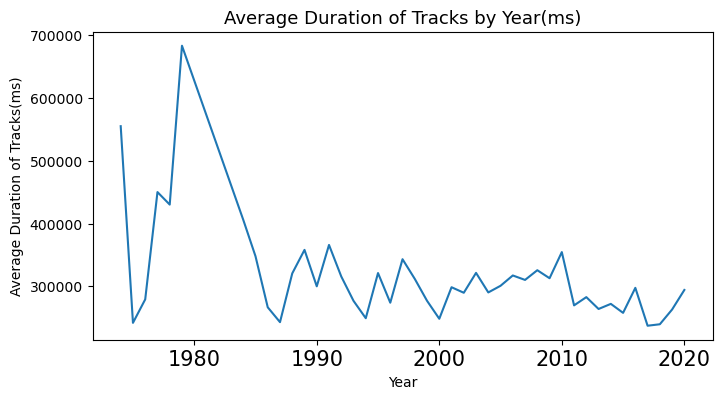

In [32]:
fig, ax = plt.subplots(1, figsize = (8, 4))
ax.plot(avg_duration_ms_year)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
ax.set_title('Average Duration of Tracks by Year(ms)', fontsize = 13)
ax.set_ylabel('Average Duration of Tracks(ms)', fontsize = 10)
ax.set_xlabel('Year', fontsize = 10)
plt.grid(False)
plt.show()

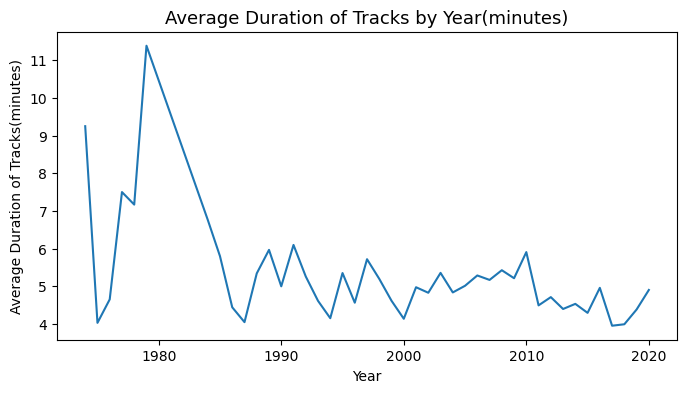

In [33]:
fig, ax = plt.subplots(1, figsize = (8, 4))
ax.plot(avg_duration_min_year)
ax.set_title('Average Duration of Tracks by Year(minutes)', fontsize = 13)
ax.set_ylabel('Average Duration of Tracks(minutes)', fontsize = 10)
ax.set_xlabel('Year', fontsize = 10)
plt.grid(False)

## Q: Plot average loudness of tracks by year

In [34]:
# To be completed

In [35]:
df4 = spotify_df[['album_release_year', 'loudness']]
avg_loudness_year = df4.groupby(['album_release_year']).mean()
avg_loudness_year

,loudness
album_release_year,
1974,-16.395800
1975,-15.795900
1976,-11.953462
1977,-12.937381
1978,-12.208500
1979,-17.566200
1984,-14.219476
1985,-12.783000
1986,-11.974242


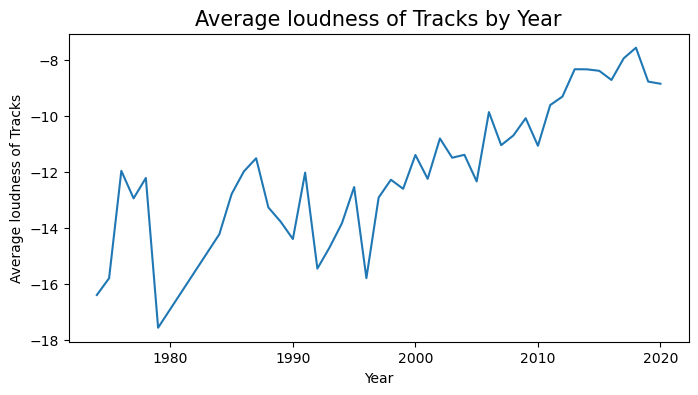

In [36]:
fig, ax = plt.subplots(1, figsize = (8, 4))
ax.plot(avg_loudness_year)
ax.set_title('Average loudness of Tracks by Year', fontsize = 15)
ax.set_ylabel('Average loudness of Tracks', fontsize = 10)
ax.set_xlabel('Year', fontsize = 10)
plt.grid(False)

## Q: Music attributes of songs over the years


In [37]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]
# To be completed

In [38]:
df_target = spotify_df[['album_release_year']]
df_target = df_target.join(spotify_df[target_cols])
df_target

,album_release_year,acousticness,danceability,energy,speechiness,liveness,valence
0,2020,0.839,0.437,0.390,0.0299,0.1360,0.3300
1,2020,0.970,0.379,0.146,0.0414,0.0812,0.3460
2,2020,0.664,0.437,0.453,0.0349,0.1100,0.5010
3,2020,0.915,0.488,0.138,0.0451,0.2120,0.4450
4,2020,0.657,0.301,0.443,0.0334,0.1200,0.4100
...,...,...,...,...,...,...,...
10627,1985,0.946,0.356,0.499,0.0452,0.3530,0.3960
10628,2008,0.982,0.318,0.163,0.0690,0.6670,0.1610
10629,2008,0.883,0.213,0.218,0.0350,0.2630,0.1390
10630,2008,0.842,0.242,0.304,0.0369,0.7980,0.2100


In [39]:
year_attributes = df_target.groupby('album_release_year')
year_attributes

Text(0.5, 0, 'Year')

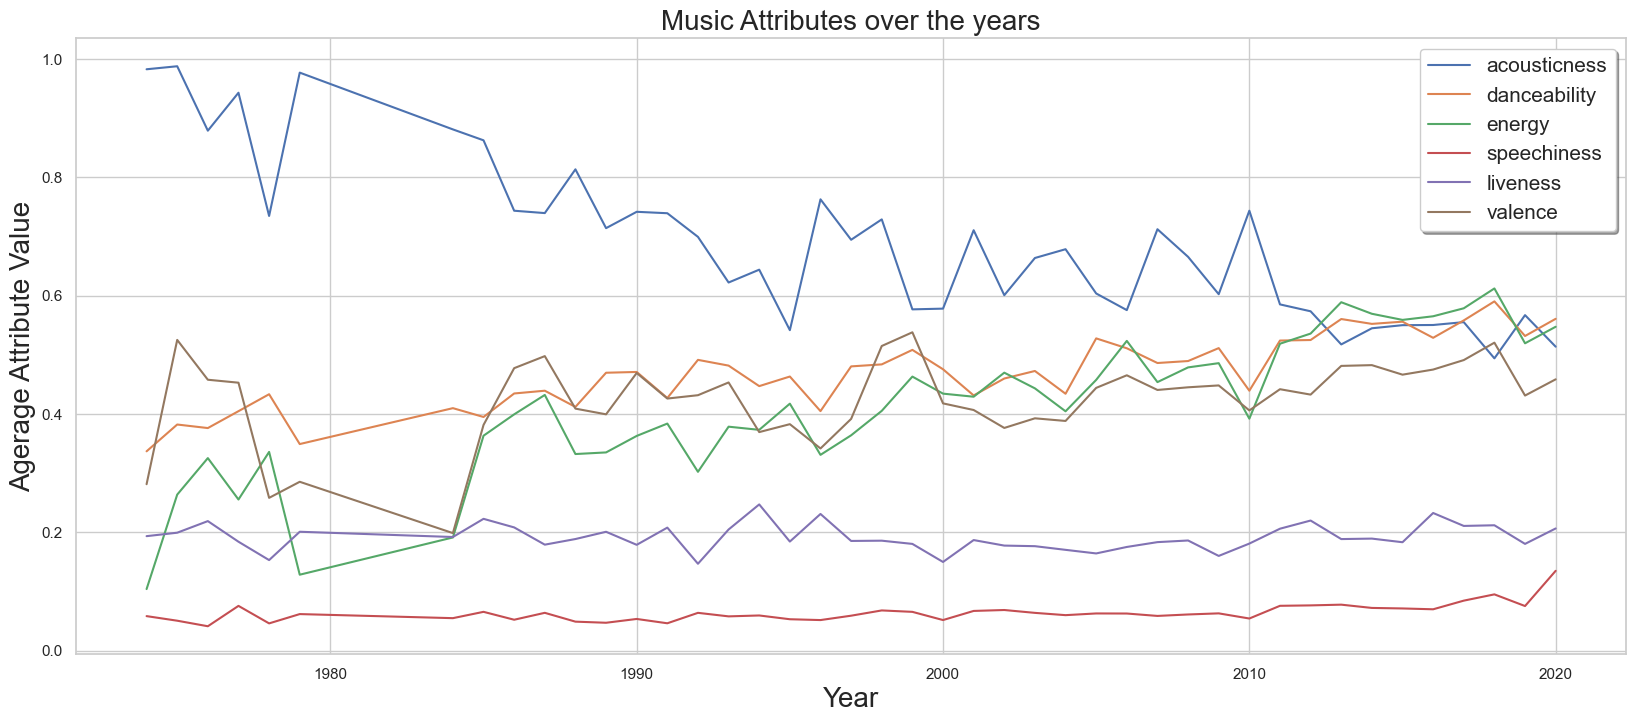

In [40]:
plt.figure(figsize=(20, 8))
sns.set(style = "whitegrid" )

for c in target_cols:
    # group the data by year, and plot the mean score of all music in that year
    x = df_target.groupby("album_release_year")[c].mean()
    ax= sns.lineplot(x=x.index,y=x,label=c)

ax.set_title('Music Attributes over the years', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 15}, loc = 'upper right')
ax.set_ylabel('Agerage Attribute Value', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

## Q: Plot top 10 popular tracks (Bar Chart)

In [41]:
# To be completed popularity

In [42]:
df_popularity = spotify_df[['track_name','popularity']]

In [43]:
df_popularity_top10 = df_popularity.sort_values(by = 'popularity', ascending=False)[:10]
df_popularity_top10

,track_name,popularity
9173,Gentleman,48.0
9172,Doctor,46.0
6578,Asheghaneh,43.0
7250,Zolf,42.0
4050,Age Ye Rooz,42.0
4049,Age Ye Rooz,42.0
395,Behet Ghol Midam,42.0
8834,Navazesh,41.0
9545,Gole Yakh,41.0
444,Dooset Daram,40.0


Text(0.5, 0, 'track_name')

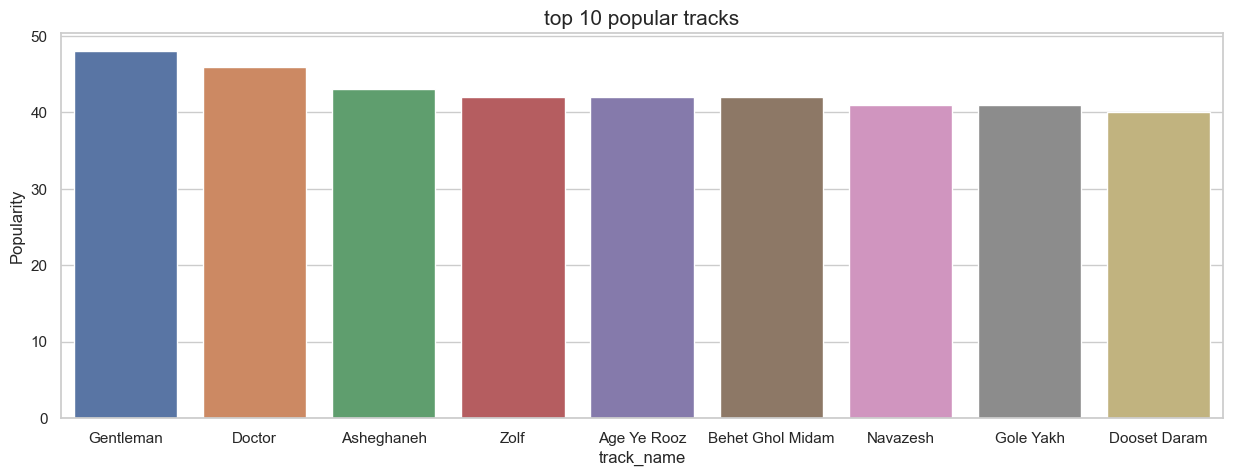

In [44]:
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")
axis = sns.barplot(data = df_popularity_top10, x='track_name', y='popularity')

axis.set_title('top 10 popular tracks', fontsize = 15)
axis.set_ylabel('Popularity')
axis.set_xlabel('track_name')

## Q: Plot top 10 popular artist (Bar Chart)

In [45]:
# To be completed

In [46]:
df_artist_popularity = spotify_df[['artist_name','popularity']]

In [47]:
artist_popularity_score = df_artist_popularity.groupby(['artist_name']).sum()
artist_popularity_score.reset_index(inplace=True)
artist_popularity_score

,artist_name,popularity
0,Abbas Ghaderi,240.0
1,Abdolhosein Mokhtabad,62.0
2,Afshin Moghaddam,49.0
3,Ali Lohrasbi,168.0
4,Ali Zand Vakili,225.0
...,...,...
64,Siavash Ghomayshi,978.0
65,Sirvan Khosravi,268.0
66,Soheil Nafissi,130.0
67,Tohi,300.0


In [48]:
artist_popularity_score['artist_name']

0             Abbas Ghaderi
1     Abdolhosein Mokhtabad
2          Afshin Moghaddam
3              Ali Lohrasbi
4           Ali Zand Vakili
              ...          
64        Siavash Ghomayshi
65          Sirvan Khosravi
66           Soheil Nafissi
67                     Tohi
68          Xaniar Khosravi
Name: artist_name, Length: 69, dtype: object

In [49]:
df_artist_popularity_top10 = artist_popularity_score.sort_values(by = 'popularity', ascending=False)[:10]
df_artist_popularity_top10

,artist_name,popularity
53,Parviz Meshkatian,1456.0
64,Siavash Ghomayshi,978.0
46,Mohammadreza Shajarian,780.0
51,Morteza Pashaei,670.0
16,Faramarz Aslani,550.0
7,Alireza Ghorbani,451.0
28,Homayoun Shajarian,433.0
12,Dang Show,402.0
38,Mazyar Fallahi,383.0
59,Sasy,381.0


Text(0.5, 0, 'artist')

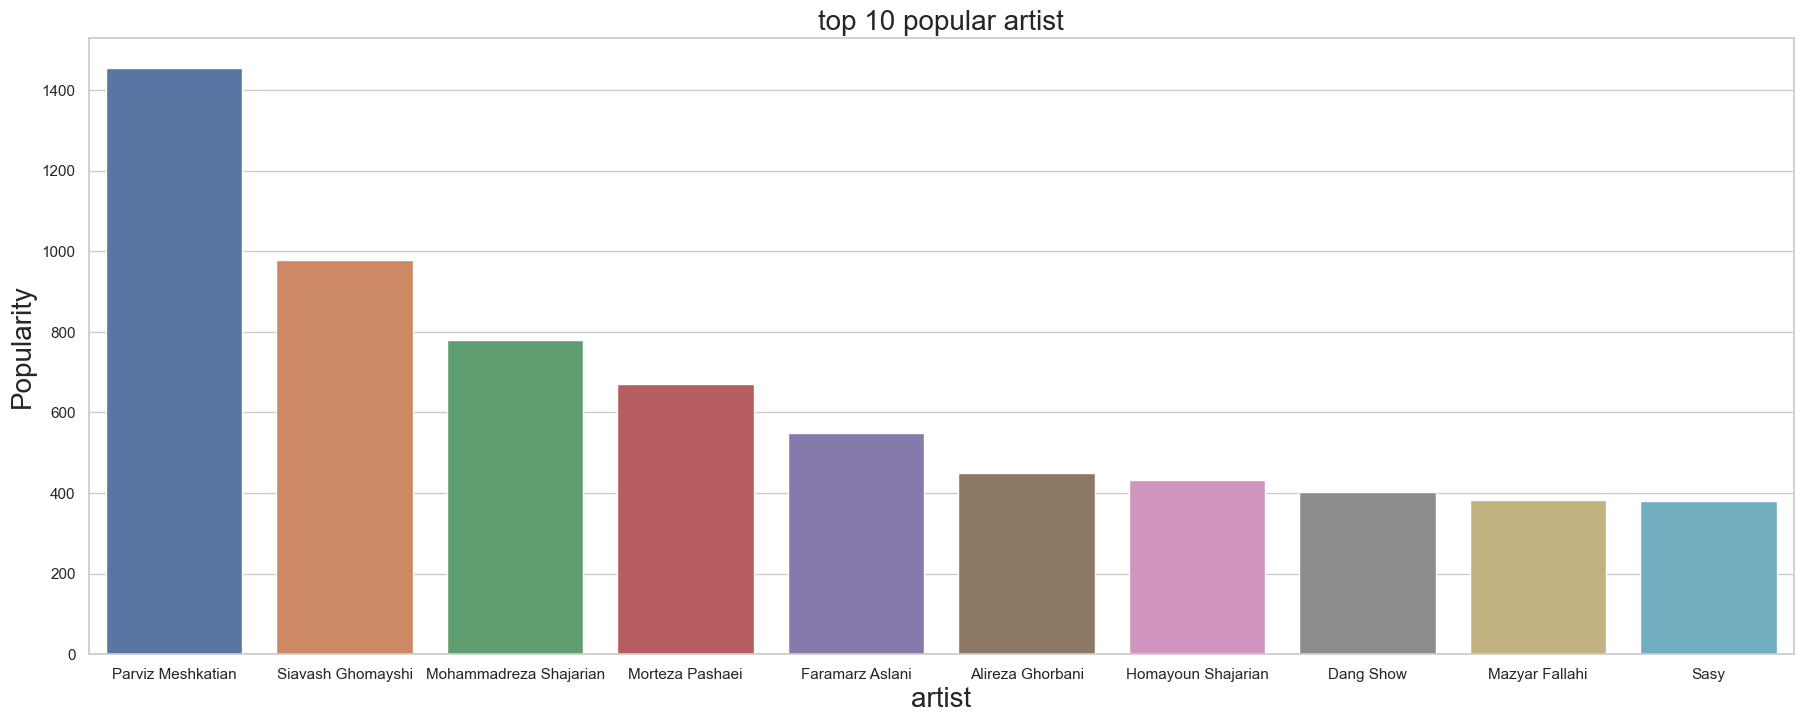

In [50]:
plt.figure(figsize=(22, 8))
sns.set(style="whitegrid")
axis = sns.barplot(data = df_artist_popularity_top10, x='artist_name', y='popularity')

axis.set_title('top 10 popular artist', fontsize = 20)
axis.set_ylabel('Popularity', fontsize = 20)
axis.set_xlabel('artist', fontsize = 20)

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

In [51]:
# To be completed

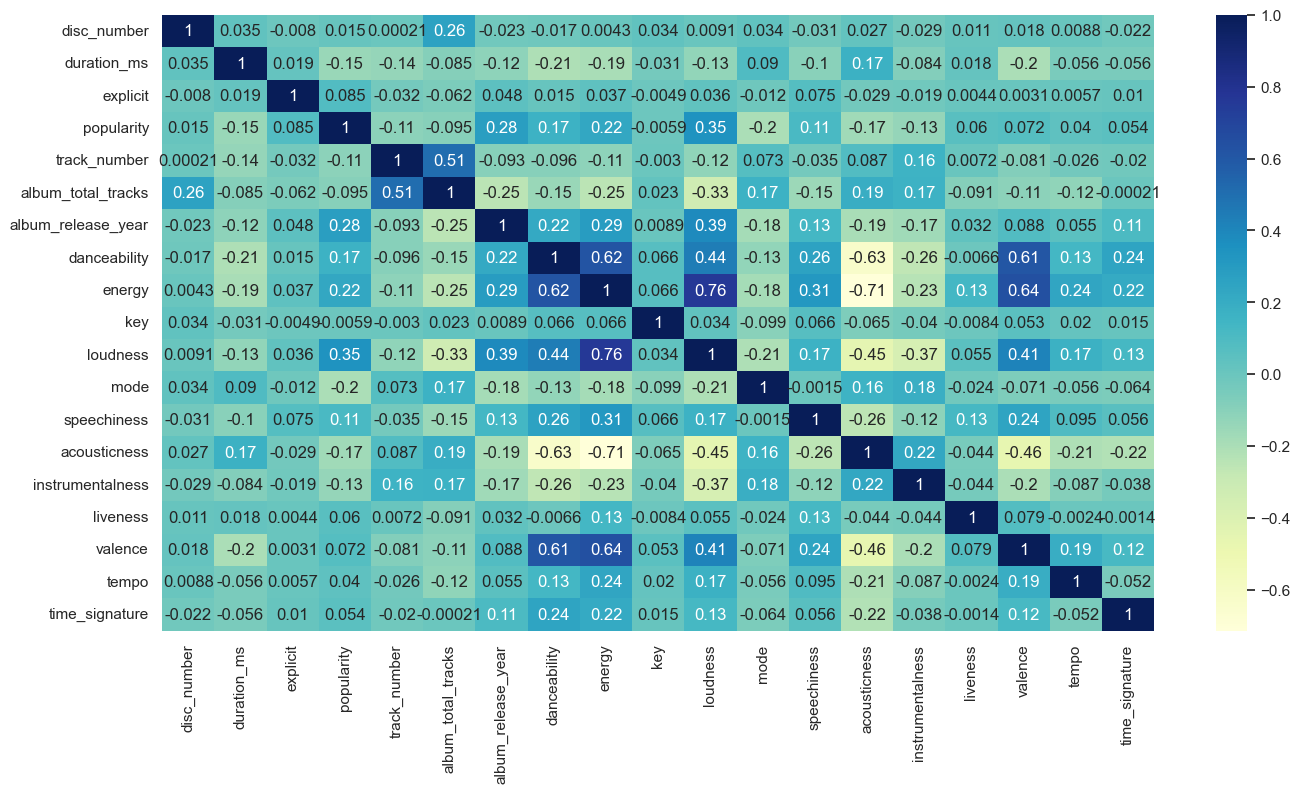

Most correlated features with duration_ms:
acousticness          0.170713
mode                  0.089504
disc_number           0.035092
explicit              0.018728
liveness              0.018118
key                  -0.031191
time_signature       -0.055702
tempo                -0.055874
instrumentalness     -0.084382
album_total_tracks   -0.084771
speechiness          -0.102299
album_release_year   -0.117552
loudness             -0.129694
track_number         -0.136570
popularity           -0.150982
energy               -0.193684
valence              -0.200632
danceability         -0.210401
Name: duration_ms, dtype: float64
Most correlated features with popularity:
loudness              0.345591
album_release_year    0.278081
energy                0.223515
danceability          0.166421
speechiness           0.114274
explicit              0.085311
valence               0.072353
liveness              0.060086
time_signature        0.054152
tempo                 0.039718
disc_number  

In [52]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = spotify_df.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")
plt.show()

most_correlated_duration = corr['duration_ms'].sort_values(ascending=False)[1:]
most_correlated_popularity = corr['popularity'].sort_values(ascending=False)[1:]

print("Most correlated features with duration_ms:")
print(most_correlated_duration)
print("Most correlated features with popularity:")
print(most_correlated_popularity)

## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

In [53]:
# To be completed

<AxesSubplot:xlabel='energy'>

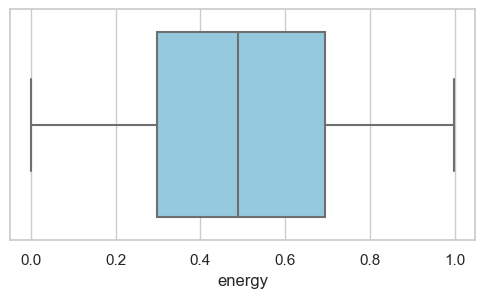

In [54]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=spotify_df, x='energy',color='skyblue')

<AxesSubplot:xlabel='liveness'>

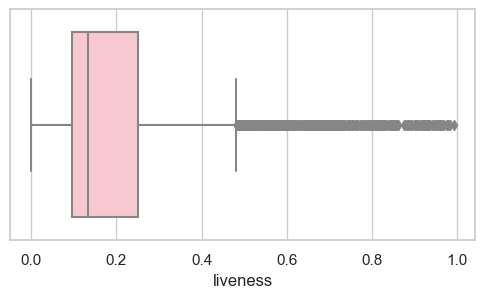

In [55]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=spotify_df, x='liveness', color='pink')

## Q: Missing values 
How many `nan` values are there in each column?

In [56]:
# To be completed

In [57]:
print("Missing values:")
spotify_df.isnull().sum()

Missing values:


track_id                  0
disc_number               0
duration_ms               0
explicit                  0
track_name                0
track_name_farsi      10020
artist_name               0
artist_name_farsi         0
popularity             9701
track_number              0
album_href             9701
album_id                  0
album_name                0
album_release_date        0
album_total_tracks     9701
album_release_year        0
track_href                0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
key_name                144
mode_name               144
key_mode                144
dtype: int64

# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.
***
popularity and album_total_tracks missing values:
Mean is preferred if data is numeric and not skewed. --> popularity distplot is not skewed
Median is preferred if data is numeric and skewed. --> album_total_tracks is positive skewed

In [58]:
# To be completed

In [59]:
# To be completed

In [60]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10632 entries, 0 to 10631
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   track_id            10632 non-null  object        
 1   disc_number         10632 non-null  int64         
 2   duration_ms         10632 non-null  int64         
 3   explicit            10632 non-null  int64         
 4   track_name          10632 non-null  object        
 5   track_name_farsi    612 non-null    object        
 6   artist_name         10632 non-null  object        
 7   artist_name_farsi   10632 non-null  object        
 8   popularity          931 non-null    float64       
 9   track_number        10632 non-null  int64         
 10  album_href          931 non-null    object        
 11  album_id            10632 non-null  object        
 12  album_name          10632 non-null  object        
 13  album_release_date  10632 non-null  datetime64

In [61]:
categorical_cols = list(spotify_df.select_dtypes(include=['object']).columns)
categorical_cols

['track_id',
 'track_name',
 'track_name_farsi',
 'artist_name',
 'artist_name_farsi',
 'album_href',
 'album_id',
 'album_name',
 'track_href',
 'key_name',
 'mode_name',
 'key_mode']

In [62]:
numeric_cols = list(spotify_df.select_dtypes(include=['int64', 'bool', 'float64']).columns)
numeric_cols

['disc_number',
 'duration_ms',
 'explicit',
 'popularity',
 'track_number',
 'album_total_tracks',
 'album_release_year',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [63]:
#convert
spotify_df[categorical_cols] = spotify_df[categorical_cols].fillna('None')
spotify_df['popularity'].fillna(spotify_df['popularity'].mean(), inplace=True)
spotify_df['album_total_tracks'].fillna(spotify_df['album_total_tracks'].median(), inplace=True)

In [64]:
print("Missing values:")
spotify_df.isnull().sum()

Missing values:


track_id              0
disc_number           0
duration_ms           0
explicit              0
track_name            0
track_name_farsi      0
artist_name           0
artist_name_farsi     0
popularity            0
track_number          0
album_href            0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_release_year    0
track_href            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
key_name              0
mode_name             0
key_mode              0
dtype: int64

In [65]:
spotify_df.describe()

,disc_number,duration_ms,explicit,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,0.001975,20.113856,5.576279,9.974417,2008.937265,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,0.044401,3.080703,4.533367,1.996494,8.694986,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,0.000000,1.000000,1.000000,1974.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,0.000000,20.113856,2.000000,10.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,0.000000,20.113856,5.000000,10.000000,2011.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,0.000000,20.113856,8.000000,10.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,1.000000,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# Determine your desired features here

In [66]:
spotify_df['artist_name'].value_counts()

Mohammadreza Shajarian    554
Hossein Alizadeh          545
Reza Sadeghi              507
Dariush                   465
Alireza Eftekhari         439
                         ... 
Nasser Abdollahi           22
Mohammad Golriz            17
Ebrahim Monsefi            16
Farman Fathalian           10
Koveyti Poor                9
Name: artist_name, Length: 69, dtype: int64

In [67]:
music_feature_cols = [
     'duration_ms',
     'explicit',
     'popularity',
     'album_release_year',
     'danceability',
     'energy',
     'key',
     'loudness',
     'mode',
     'speechiness',
     'acousticness',
     'instrumentalness',
     'liveness',
     'valence',
     'tempo',
     'time_signature',
     'key_name',
     'mode_name',
     'key_mode'
]

In [68]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()
tracks_feature_df

,duration_ms,explicit,popularity,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode,artist_name
0,446880,0,20.113856,2020,0.437,0.390,0,-7.170,0,0.0299,0.839,0.000035,0.1360,0.3300,131.913,3,C,minor,C minor,Salar Aghili
1,851920,0,20.113856,2020,0.379,0.146,5,-10.008,1,0.0414,0.970,0.000360,0.0812,0.3460,105.634,4,F,major,F major,Salar Aghili
2,293160,0,20.113856,2020,0.437,0.453,5,-5.392,0,0.0349,0.664,0.002070,0.1100,0.5010,94.651,5,F,minor,F minor,Salar Aghili
3,648720,0,20.113856,2020,0.488,0.138,2,-12.287,0,0.0451,0.915,0.006580,0.2120,0.4450,110.967,5,D,minor,D minor,Salar Aghili
4,273480,0,20.113856,2020,0.301,0.443,0,-5.702,0,0.0334,0.657,0.000008,0.1200,0.4100,148.053,1,C,minor,C minor,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,397505,0,20.113856,1985,0.356,0.499,4,-10.805,0,0.0452,0.946,0.005460,0.3530,0.3960,146.591,5,E,minor,E minor,Shahram Nazeri
10628,3522173,0,20.113856,2008,0.318,0.163,5,-17.538,0,0.0690,0.982,0.061400,0.6670,0.1610,72.379,3,F,minor,F minor,Shahram Nazeri
10629,3402706,0,20.113856,2008,0.213,0.218,8,-15.865,1,0.0350,0.883,0.019400,0.2630,0.1390,86.645,4,G#,major,G# major,Shahram Nazeri
10630,3342733,0,20.113856,2008,0.242,0.304,8,-13.286,1,0.0369,0.842,0.223000,0.7980,0.2100,77.819,3,G#,major,G# major,Shahram Nazeri


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

In [69]:
# To be completed

In [70]:
tracks_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10632 entries, 0 to 10631
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration_ms         10632 non-null  int64  
 1   explicit            10632 non-null  int64  
 2   popularity          10632 non-null  float64
 3   album_release_year  10632 non-null  int64  
 4   danceability        10632 non-null  float64
 5   energy              10632 non-null  float64
 6   key                 10632 non-null  int64  
 7   loudness            10632 non-null  float64
 8   mode                10632 non-null  int64  
 9   speechiness         10632 non-null  float64
 10  acousticness        10632 non-null  float64
 11  instrumentalness    10632 non-null  float64
 12  liveness            10632 non-null  float64
 13  valence             10632 non-null  float64
 14  tempo               10632 non-null  float64
 15  time_signature      10632 non-null  int64  
 16  key_

In [71]:
numeric_cols = ['duration_ms', 'explicit', 'album_release_year',
               'danceability', 'energy', 'key', 'loudness', 'mode',
               'speechiness', 'acousticness', 'instrumentalness', 'liveness',
               'valence', 'tempo', 'time_signature']

categorical_cols = ['key_name', 'mode_name', 'key_mode']

In [72]:
scaler = StandardScaler()
df_numeric = scaler.fit_transform(tracks_feature_df[numeric_cols])

In [73]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_categorical = encoder.fit_transform(tracks_feature_df[categorical_cols]).toarray()

In [74]:
spotify_df.describe()

,disc_number,duration_ms,explicit,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,0.001975,20.113856,5.576279,9.974417,2008.937265,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,0.044401,3.080703,4.533367,1.996494,8.694986,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,0.000000,1.000000,1.000000,1974.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,0.000000,20.113856,2.000000,10.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,0.000000,20.113856,5.000000,10.000000,2011.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,0.000000,20.113856,8.000000,10.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,1.000000,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


In [75]:
categorical_features = list(encoder.get_feature_names_out(categorical_cols))
df_categorical = pd.DataFrame(df_categorical, columns=categorical_features)
df_numeric = pd.DataFrame(df_numeric, columns=numeric_cols)
df_new = pd.concat([df_numeric, df_categorical], axis=1)
df_new['artist_name'] = tracks_feature_df['artist_name']
df_new['popularity'] = tracks_feature_df['popularity']

In [76]:
df_new

,duration_ms,explicit,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,key_mode_F minor,key_mode_F# major,key_mode_F# minor,key_mode_G major,key_mode_G minor,key_mode_G# major,key_mode_G# minor,key_mode_None,artist_name,popularity
0,0.932542,-0.044487,1.272372,-0.428643,-0.440144,-1.432162,0.629863,-0.772888,-0.561985,0.721928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856
1,3.321961,-0.044487,1.272372,-0.765201,-1.449424,-0.056665,0.013646,1.293849,-0.400182,1.134163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856
2,0.025714,-0.044487,1.272372,-0.428643,-0.179551,-0.056665,1.015921,-0.772888,-0.491636,0.171232,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856
3,2.123240,-0.044487,1.272372,-0.132704,-1.482515,-0.881964,-0.481195,-0.772888,-0.348124,0.961087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856
4,-0.090383,-0.044487,1.272372,-1.217813,-0.220915,-1.432162,0.948610,-0.772888,-0.512741,0.149205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,0.641268,-0.044487,-2.753126,-0.898663,0.010723,-0.331765,-0.159407,-0.772888,-0.346717,1.058639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shahram Nazeri,20.113856
10628,19.074364,-0.044487,-0.107799,-1.119167,-1.379105,-0.056665,-1.621347,-0.772888,-0.011856,1.171925,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shahram Nazeri,20.113856
10629,18.369602,-0.044487,-0.107799,-1.728453,-1.151603,0.768633,-1.258088,1.293849,-0.490229,0.860389,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Shahram Nazeri,20.113856
10630,18.015808,-0.044487,-0.107799,-1.560174,-0.795874,0.768633,-0.698108,1.293849,-0.463496,0.731369,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Shahram Nazeri,20.113856


In [77]:
tracks_feature_df = df_new

## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


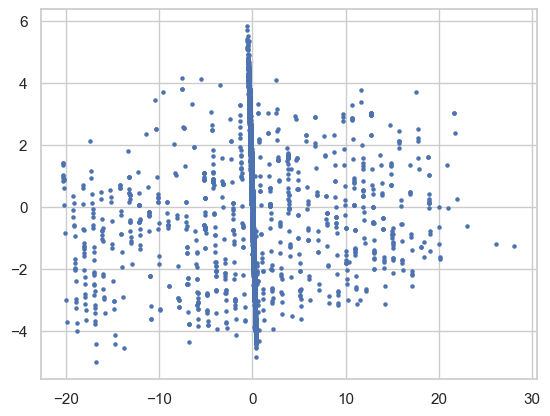

In [78]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


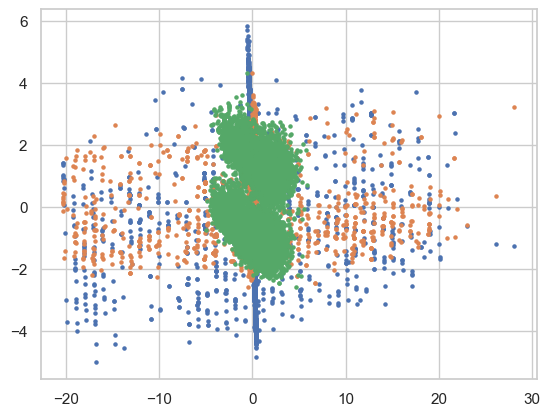

In [79]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [80]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

In [81]:
numeric_features = ['loudness','album_release_year', 'danceability']     

In [82]:
df = tracks_feature_df
regression_features = numeric_features + categorical_features
    # Your desired features columns
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [83]:
regressor = LinearRegression(fit_intercept = True
    # pass parameters here
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

1689441153092.7466
[ 2.25513632e-01  1.18280770e-01  3.10741326e-02 -1.03770930e+13
  5.34211422e+12  4.13005495e+12 -9.92884295e+11  1.39955354e+12
 -2.66594292e+12 -2.22678701e+12 -6.12624763e+10 -1.05559480e+12
  1.14340990e+12  2.72941310e+12 -1.31441264e+11 -5.26642641e+11
 -4.99990681e+11 -1.15313288e+12 -3.18412927e+12  9.84078475e+12
  1.18717811e+13 -5.87842249e+12 -3.84742611e+12 -4.66636322e+12
 -2.63536684e+12  4.56576024e+11  2.48757241e+12 -1.93586181e+12
  9.51345778e+10  2.12963465e+12  4.16063103e+12  1.69047874e+12
  3.72147512e+12 -4.75045795e+11  1.55595059e+12  5.19286530e+11
  2.55028291e+12 -1.67971817e+12  3.51278218e+11 -3.26572137e+12
 -1.23472499e+12 -4.04867007e+11  1.62612938e+12 -6.62807831e+11]


## Evaluate Regression Algorithm

In [84]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,20.168457
1,20.113856,20.323730
2,20.113856,20.319336
3,20.113856,20.216309
4,20.113856,20.297363
...,...,...
3185,20.113856,20.248535
3186,12.000000,20.304199
3187,20.113856,19.556152
3188,20.113856,20.046387


In [85]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9855004706153363
Mean Squared Error: 8.799146554291884
Root Mean Squared Error: 2.966335543105649


# Classification

## Prepare Labels

In [86]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [87]:
# To be completed

In [88]:
tracks_feature_df

,duration_ms,explicit,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,key_mode_F minor,key_mode_F# major,key_mode_F# minor,key_mode_G major,key_mode_G minor,key_mode_G# major,key_mode_G# minor,key_mode_None,artist_name,popularity
0,0.932542,-0.044487,1.272372,-0.428643,-0.440144,-1.432162,0.629863,-0.772888,-0.561985,0.721928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856
1,3.321961,-0.044487,1.272372,-0.765201,-1.449424,-0.056665,0.013646,1.293849,-0.400182,1.134163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856
2,0.025714,-0.044487,1.272372,-0.428643,-0.179551,-0.056665,1.015921,-0.772888,-0.491636,0.171232,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856
3,2.123240,-0.044487,1.272372,-0.132704,-1.482515,-0.881964,-0.481195,-0.772888,-0.348124,0.961087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856
4,-0.090383,-0.044487,1.272372,-1.217813,-0.220915,-1.432162,0.948610,-0.772888,-0.512741,0.149205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,0.641268,-0.044487,-2.753126,-0.898663,0.010723,-0.331765,-0.159407,-0.772888,-0.346717,1.058639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shahram Nazeri,20.113856
10628,19.074364,-0.044487,-0.107799,-1.119167,-1.379105,-0.056665,-1.621347,-0.772888,-0.011856,1.171925,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shahram Nazeri,20.113856
10629,18.369602,-0.044487,-0.107799,-1.728453,-1.151603,0.768633,-1.258088,1.293849,-0.490229,0.860389,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Shahram Nazeri,20.113856
10630,18.015808,-0.044487,-0.107799,-1.560174,-0.795874,0.768633,-0.698108,1.293849,-0.463496,0.731369,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Shahram Nazeri,20.113856


In [89]:
tracks_feature_df['is_sonnati'] = tracks_feature_df['artist_name'].apply(lambda x: 1 if x in sonnati_artists else 0)

In [90]:
tracks_feature_df.describe()

,duration_ms,explicit,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,key_mode_F minor,key_mode_F# major,key_mode_F# minor,key_mode_G major,key_mode_G minor,key_mode_G# major,key_mode_G# minor,key_mode_None,popularity,is_sonnati
count,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,...,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,-2.529120e-17,1.522739e-15,6.514374e-15,-1.009559e-16,-4.520671e-16,-2.317142e-16,-1.751640e-16,-2.451513e-15,2.172615e-15,-3.415878e-16,...,0.050602,0.018717,0.028969,0.052953,0.066309,0.025583,0.019846,0.013544,20.113856,0.358728
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,...,0.219194,0.135530,0.167728,0.223951,0.248834,0.157896,0.139477,0.115593,3.080703,0.479650
min,-1.680127e+00,-4.448683e-02,-4.018282e+00,-2.964434e+00,-2.049304e+00,-1.432162e+00,-5.934864e+00,-7.728879e-01,-9.826719e-01,-1.918195e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.028027e-01,-4.448683e-02,-4.528415e-01,-8.058199e-01,-8.206920e-01,-8.819636e-01,-5.634327e-01,-7.728879e-01,-4.747521e-01,-8.735159e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.113856,0.000000
50%,-2.075528e-01,-4.448683e-02,2.372439e-01,-8.047930e-02,-3.064107e-02,-5.666550e-02,2.179660e-01,-7.728879e-01,-3.509379e-01,3.631892e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.113856,0.000000
75%,2.653078e-01,-4.448683e-02,8.123150e-01,8.189431e-01,8.131829e-01,1.043732e+00,7.497731e-01,1.293849e+00,-3.682961e-02,8.572419e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.113856,1.000000
max,2.176604e+01,2.247856e+01,1.272372e+00,2.629393e+00,2.074783e+00,1.593931e+00,2.050765e+00,1.293849e+00,1.222887e+01,1.215981e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.000000,1.000000


## Create Classification Dataset

In [91]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati', 'artist_name']).values
y = tracks_feature_df['is_sonnati'].values

In [92]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 58)
y.shape=(10632,)


In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [94]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    
    # train model
    classifier = make_pipeline(StandardScaler(), model)
    
    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])
    
    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)
    
    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [95]:
from sklearn import tree
from sklearn import svm
import warnings
warnings.filterwarnings(action='ignore')

In [96]:
models={
    'KNeighborsClassifier(3)':KNeighborsClassifier(n_neighbors=3),
    'KNeighborsClassifier(5)':KNeighborsClassifier(n_neighbors=5),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=RANDOM_SEED),
    'GaussianNB':GaussianNB(),
    'RandomForestClassifier(entropy)':RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=RANDOM_SEED),
    'RandomForestClassifier(gini1)':RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=RANDOM_SEED),
    'RandomForestClassifier(gini2)':RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=RANDOM_SEED),
    'RandomForestClassifier(gini4)':RandomForestClassifier(n_estimators=800, criterion='entropy', random_state=RANDOM_SEED),
    'RandomForestClassifier(gini5)':RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=RANDOM_SEED),
    'SVM' : svm.SVC(kernel='rbf')
    }

In [97]:
dataset = (x, y)
for i, model in models.items():

    print("model: ", model)
    pprint(fit_and_eval(model, dataset))
    print("-" * 50)

model:  KNeighborsClassifier(n_neighbors=3)
{'acc': 0.8203761755485893,
 'confusion': array([[1807,  288],
       [ 285,  810]]),
 'f1': 0.7387140902872777,
 'precision': 0.7377049180327869,
 'recall': 0.7397260273972602}
--------------------------------------------------
model:  KNeighborsClassifier()
{'acc': 0.8197492163009404,
 'confusion': array([[1805,  290],
       [ 285,  810]]),
 'f1': 0.7380410022779043,
 'precision': 0.7363636363636363,
 'recall': 0.7397260273972602}
--------------------------------------------------
model:  DecisionTreeClassifier(random_state=42)
{'acc': 0.8213166144200627,
 'confusion': array([[1809,  286],
       [ 284,  811]]),
 'f1': 0.739963503649635,
 'precision': 0.7392889699179581,
 'recall': 0.7406392694063927}
--------------------------------------------------
model:  GaussianNB()
{'acc': 0.7626959247648902,
 'confusion': array([[1672,  423],
       [ 334,  761]]),
 'f1': 0.6678367705133832,
 'precision': 0.6427364864864865,
 'recall': 0.6949771689

In [98]:
#autograde
# the best model you want to be evaluated. Just pass do the same way as above cell
from sklearn.ensemble import RandomForestClassifier

pprint(fit_and_eval(RandomForestClassifier(n_estimators=800, criterion='entropy', random_state=RANDOM_SEED),dataset))

{'acc': 0.8846394984326019,
 'confusion': array([[1894,  201],
       [ 167,  928]]),
 'f1': 0.8345323741007195,
 'precision': 0.8219663418954827,
 'recall': 0.8474885844748858}
